# Importing the necessary libraries

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset mushrooms.csv into the python environment

In [2]:
data = pd.read_csv("mushrooms.csv")

# Descriptive Analytics

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Since there are only object features in the dataset we do not need to conduct normalization or scaling to the dataset.

In [6]:
data.shape

(8124, 23)

The datset contains 8124 observations and 23 features.

In [7]:
 %whos

Variable           Type         Data/Info
-----------------------------------------
BernoulliNB        ABCMeta      <class 'sklearn.naive_bayes.BernoulliNB'>
GaussianNB         ABCMeta      <class 'sklearn.naive_bayes.GaussianNB'>
LabelEncoder       type         <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
OneHotEncoder      type         <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
StandardScaler     type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
accuracy_score     function     <function accuracy_score at 0x000002701B468B80>
confusion_matrix   function     <function confusion_matrix at 0x000002701B468C10>
data               DataFrame         class cap-shape cap-<...>n[8124 rows x 23 columns]
f1_score           function     <function f1_score at 0x000002701B468F70>
np                 module       <module 'numpy' from 'D:\<...>ges\\numpy\\__init__.py'>
pd                 module       <module 'pandas' from 'D:<...>es\\pandas\\__init__.py'>
plt  

In [8]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We can see that there are no null values or NaN values in the dataset.

In [9]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
data.groupby('class').describe()

cap-shape                  cap-surface                  cap-color  \
          count unique top  freq       count unique top  freq     count   
class                                                                     
e          4208      5   x  1948        4208      3   f  1560      4208   
p          3916      5   x  1708        3916      4   y  1740      3916   

              ... spore-print-color       population                  habitat  \
      unique  ...               top  freq      count unique top  freq   count   
class         ...                                                               
e         10  ...                 n  1744       4208      6   v  1192    4208   
p          8  ...                 w  1812       3916      4   v  2848    3916   

                        
      unique top  freq  
class                   
e          7   d  1880  
p          6   d  1268  

[2 rows x 88 columns]

# Data Pre-processing

In [11]:
data_encoded = data.copy()
le = LabelEncoder()
for col in data_encoded.columns:
    data_encoded[col] = le.fit_transform(data_encoded[col]) 
    
data_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Label encoding the object features of the dataset.

# Exploratory Data Analytics

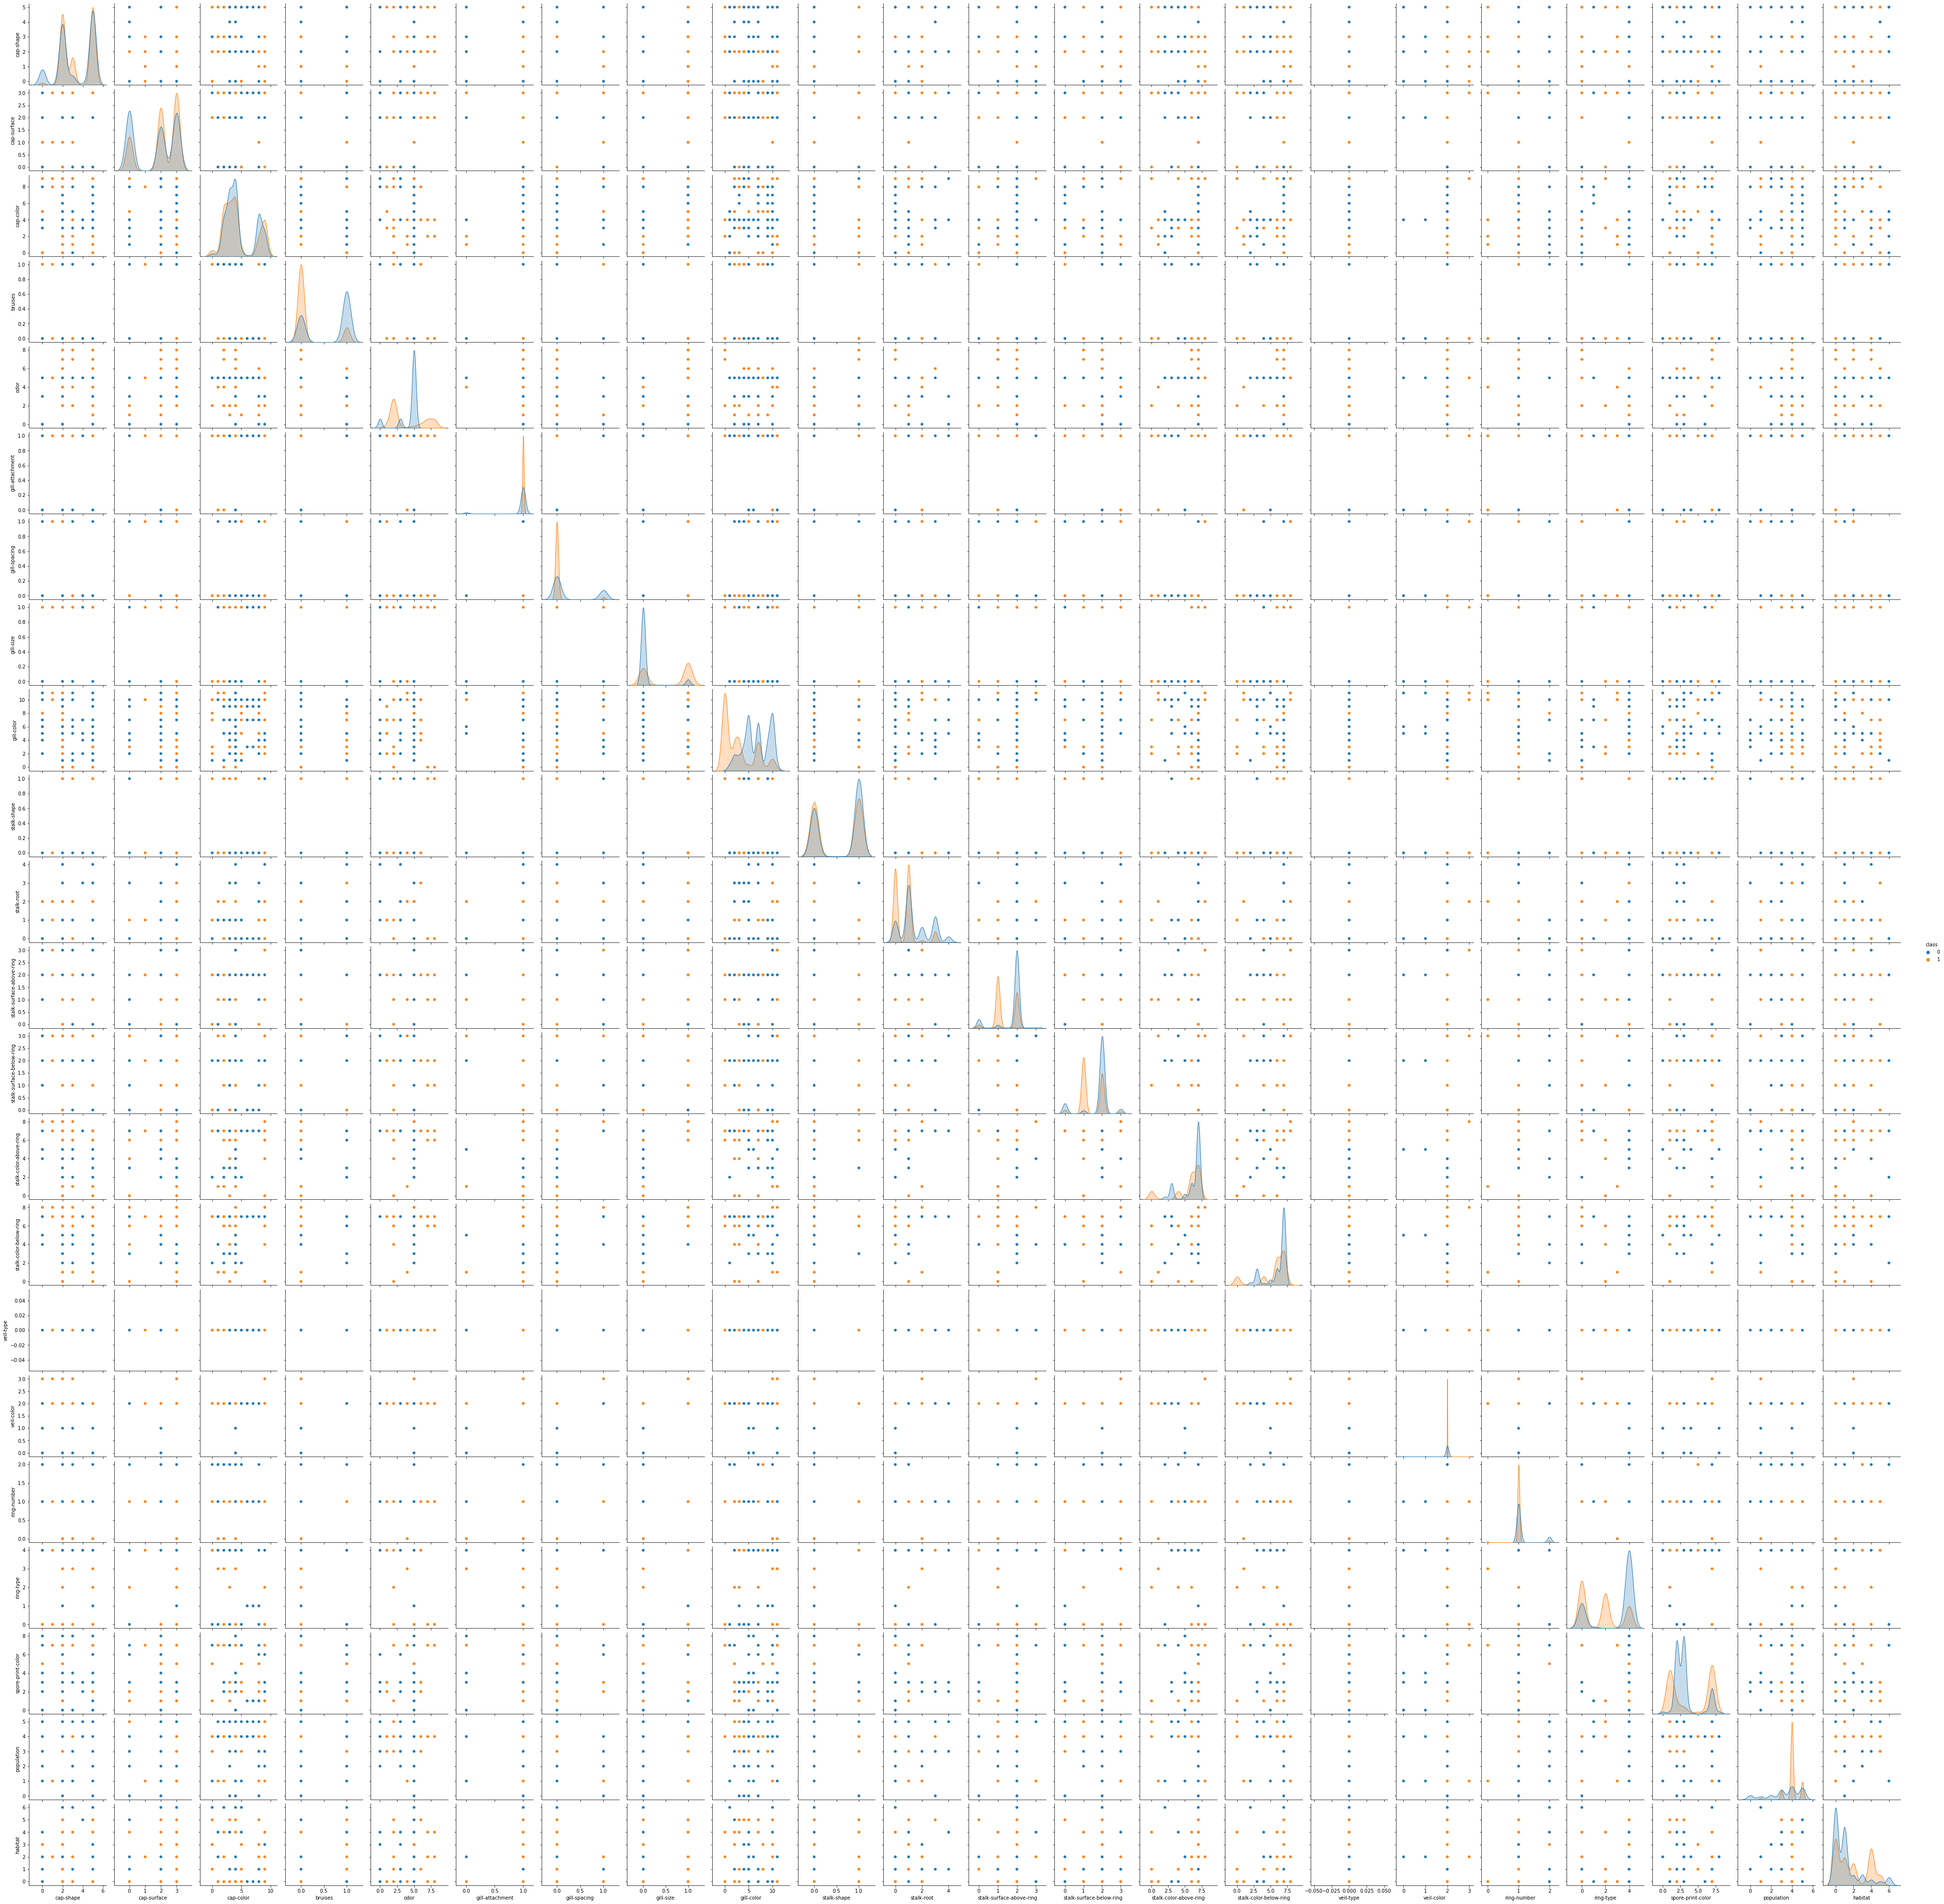

In [12]:
sns.pairplot(data_encoded, hue="class")

<AxesSubplot:xlabel='class', ylabel='count'>

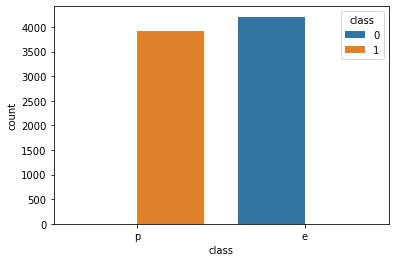

In [13]:
sns.countplot(x=data["class"], hue="class", data=data_encoded)

From the above plot we can see that the count of edible mushrooms are greater than the count of poisonous mushrooms

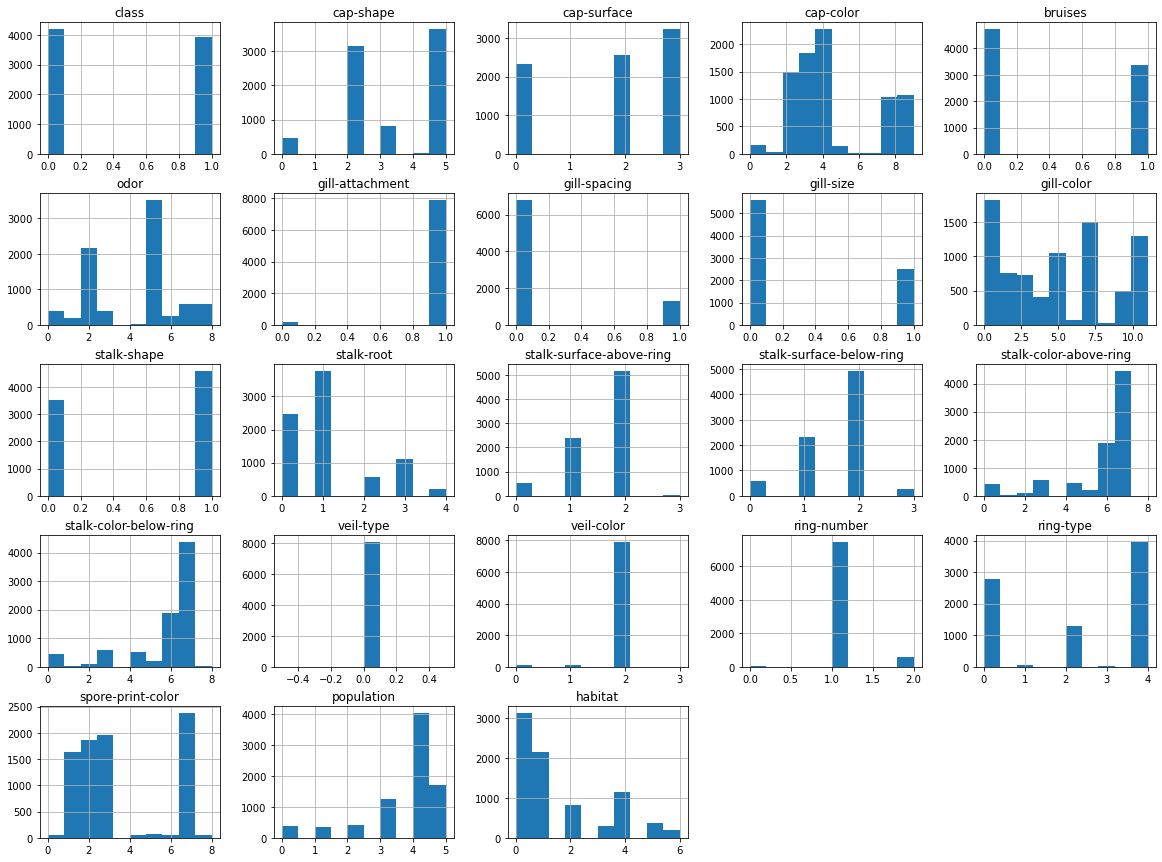

In [14]:
freqgraph=data_encoded.select_dtypes(include=["float","int"])
freqgraph.hist(figsize=(20,15))
plt.show()

From the above graph we can see that the dataset is normally distributed.

<AxesSubplot:>

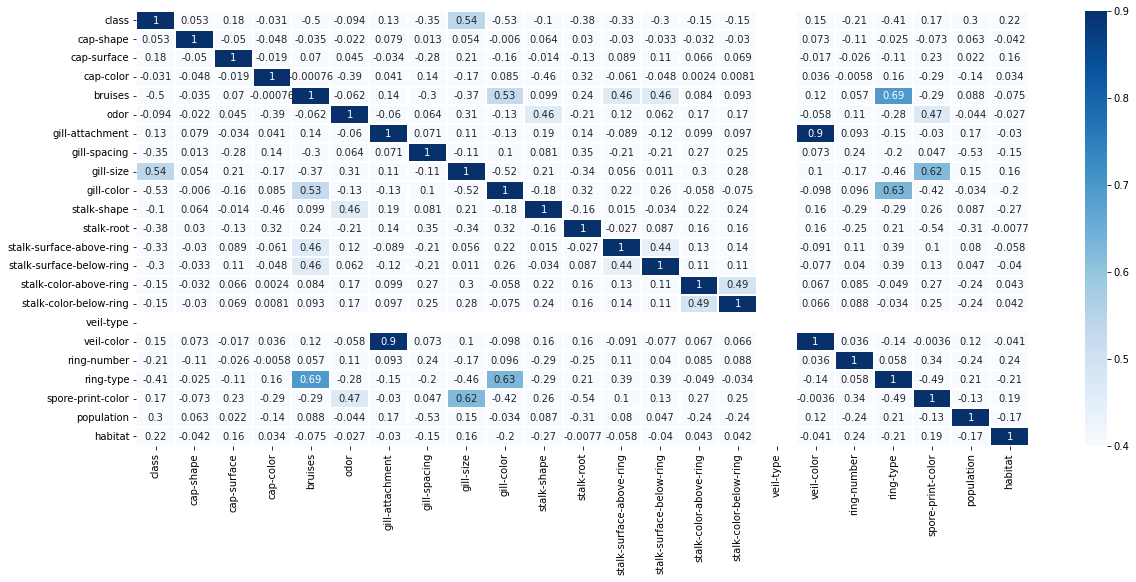

In [15]:
corrmatrix = data_encoded.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2, cmap = 'Blues')

From the heatmap we can see that the columns gill-attachment and veil-color are highly correlated.

# Feature Engineering

In [16]:
y = data_encoded['class']
x = data_encoded.drop('class',axis=1)

In [17]:
x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [18]:
#Feature Engineering
x['mean'] = x[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']].mean(axis = 1)
x['sum'] = x[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']].sum(axis = 1)
x['skew'] = x[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']].skew(axis = 1)
x['kurt'] = x[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']].kurt(axis = 1)

In [19]:
x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'mean',
       'sum', 'skew', 'kurt'],
      dtype='object')

# Splitting the dataset into train and test set

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.3)

# Data Modelling

In [21]:
#Building the Model---Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9515996718621821
Precision is:  0.9515996718621821
Recall is:  0.9515996718621821
F1 score is:  0.9515996718621821


In [25]:
confusion_matrix(y_test,y_pred)

array([[1248,   50],
       [  68, 1072]], dtype=int64)

In [26]:
#Building the Model---KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred =  classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [27]:
acc_values

[0.9979491386382281,
 0.9954881050041017,
 0.9954881050041017,
 0.9942575881870386,
 0.9950779327317474,
 0.9938474159146842,
 0.9934372436423298,
 0.9909762100082035,
 0.9922067268252666,
 0.9893355209187858,
 0.9897456931911403,
 0.9885151763740772]

Text(0, 0.5, 'Accuracy')

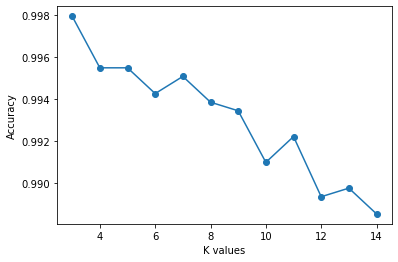

In [28]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)   

In [30]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9979491386382281
Precision is:  0.9979491386382281
Recall is:  0.9979491386382281
F1 score is:  0.9979491386382281


In [31]:
confusion_matrix(y_test,y_pred)

array([[1298,    0],
       [   5, 1135]], dtype=int64)

In [32]:
#Building the Model---Support Vector Machine---Linear Kernel
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)

In [33]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9692370795734209
Precision is:  0.9692370795734209
Recall is:  0.9692370795734209
F1 score is:  0.9692370795734209


In [34]:
confusion_matrix(y_test,y_pred)

array([[1276,   22],
       [  53, 1087]], dtype=int64)

In [36]:
#Building the Model---Support Vector Machine---Polynomial Kernel
svm_poly = SVC(kernel = 'poly', degree = 3)
svm_poly.fit(x_train,y_train)
y_pred = svm_poly.predict(x_test)

In [37]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.920836751435603
Precision is:  0.920836751435603
Recall is:  0.920836751435603
F1 score is:  0.920836751435603


In [38]:
confusion_matrix(y_test,y_pred)

array([[1254,   44],
       [ 149,  991]], dtype=int64)

In [39]:
#Building the Model---Support Vector Machine---Radial Basis Function Kernel
svm_radial = SVC(kernel = 'rbf')
svm_radial.fit(x_train,y_train)
y_pred = svm_radial.predict(x_test)

In [40]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.8929450369155045
Precision is:  0.8929450369155045
Recall is:  0.8929450369155045
F1 score is:  0.8929450369155045


In [41]:
confusion_matrix(y_test,y_pred)

array([[1266,   32],
       [ 229,  911]], dtype=int64)

In [42]:
#Building the Model---Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [43]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [44]:
confusion_matrix (y_test, y_pred)

array([[1298,    0],
       [   0, 1140]], dtype=int64)

In [46]:
#Building the Model---Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [47]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [48]:
confusion_matrix (y_test, y_pred)

array([[1298,    0],
       [   0, 1140]], dtype=int64)

In [49]:
#Building the Model---Bernoulli Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

BernoulliNB()

In [50]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [51]:
confusion_matrix (y_test, y_pred)

array([[1298,    0],
       [   0, 1140]], dtype=int64)

In [52]:
#Feature Importance
pd.Series(rf.feature_importances_, index = x.columns).sort_values(ascending=False)*100

gill-color                  13.607574
odor                        13.486837
gill-size                   12.720620
spore-print-color            9.914554
ring-type                    6.244650
stalk-root                   5.696200
population                   5.086181
gill-spacing                 4.957447
bruises                      4.569898
stalk-surface-above-ring     3.939537
habitat                      3.487549
stalk-surface-below-ring     3.472730
stalk-shape                  2.579778
sum                          1.549889
stalk-color-above-ring       1.448560
ring-number                  1.346958
stalk-color-below-ring       1.159892
cap-color                    1.055986
mean                         0.888379
skew                         0.872741
cap-surface                  0.764530
kurt                         0.437623
cap-shape                    0.309582
veil-color                   0.255478
gill-attachment              0.146826
veil-type                    0.000000
dtype: float